In [96]:
import glob
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')

In [97]:
parts = glob.glob('./results/experiment-join/*')

In [98]:
files = []
for part in parts:
    sub_parts = glob.glob(os.path.join(part, 'part-*'))
    for sub in sub_parts:
        files.append(sub)

In [99]:
files = np.array(files).flatten()

In [100]:
print(files[:5])

['./results/experiment-join/result-1633630888000/part-00001'
 './results/experiment-join/result-1633630888000/part-00000'
 './results/experiment-join/result-1633631028000/part-00001'
 './results/experiment-join/result-1633631028000/part-00000'
 './results/experiment-join/result-1633631168000/part-00001']


In [101]:
data = []
for file in files:
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            point = json.loads(line.replace("'", '"'))
            data.append(point)

In [106]:
print(data[:5])

[{'userID': 2, 'gemPackID:': 2, 'p.time': 1633630452.2573524, 'a.time': 1633630452.3206367, 'time': 1633630888.303306, 'latency': 435.98266983032227}, {'userID': 2, 'gemPackID:': 2, 'p.time': 1633630452.394287, 'a.time': 1633630452.3206367, 'time': 1633630888.3033557, 'latency': 435.9090690612793}, {'userID': 2, 'gemPackID:': 2, 'p.time': 1633630452.2235062, 'a.time': 1633630452.3206367, 'time': 1633630888.3033602, 'latency': 435.98272371292114}, {'userID': 0, 'gemPackID:': 3, 'p.time': 1633630452.2571352, 'a.time': 1633630452.4481158, 'time': 1633631028.234667, 'latency': 575.7865514755249}, {'userID': 4, 'gemPackID:': 0, 'p.time': 1633630452.331043, 'a.time': 1633630452.5187728, 'time': 1633631028.234776, 'latency': 575.7160036563873}]


In [114]:
df = pd.DataFrame(data, columns=['userID', 'gemPackID', 'p.time', 'a.time', 'time', 'latency'])

In [115]:
df['t'] = df['time'] - df['time'].min()
#

In [118]:
df = df.sort_values('t')
print(df.head(10))
print(df.tail(10))
print(df.describe())

      userID  gemPackID        p.time        a.time          time   latency  \
2630       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.262093   
2631       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.273633   
2632       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.254385   
2633       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.204293   
2634       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.216017   
2635       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.226579   
2636       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.219703   
2637       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.214624   
2638       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.240535   
2639       4        NaN  1.633630e+09  1.633630e+09  1.633630e+09  3.209794   

             t  
2630  0.000000  
2631  0.000055  
2632  0.000059  
2633  0.000102  
2634  0.000106  
2635  0.000109  
2636  0.000

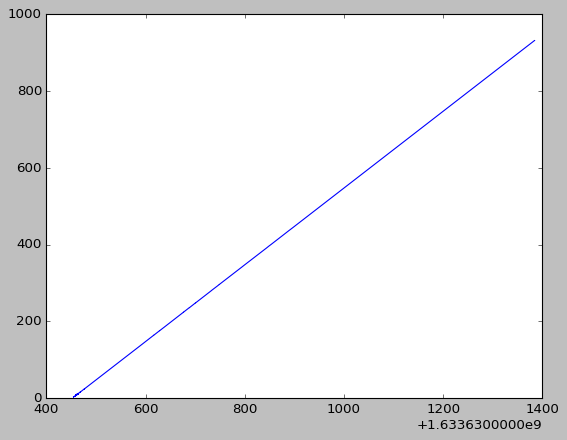

In [117]:
plt.plot(df['time'], df['latency'])